In [1]:
import pip
try:
    from sklearn.datasets import fetch_california_housing
    from sklearn.datasets import load_boston
except:
    pip.main(['install','--user','sklearn'])

The belowing code in azure can't work, because 403 error

boston = load_boston()  
california = fetch_california_housing()

In local machine å¦èµ·çç¤ï¼ä¸è½½boston,californiaå­æcsvï¼ç¶åä¼ å¥azure
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)  
dataset['target'] = boston.target
dataset.to_csv('boston.csv')

In [2]:
from azureml import Workspace
ws = Workspace(
    workspace_id='3c64d445b4c840dca9683dd47522eba3',
    authorization_token='JaC5E2q5FouX14JhvCmcvmzagqV63q0oVIbu2jblLBdQ5e5wf/Y24Ed6uXLvbSUgbiao5iF85C3uufYKQgXoNw==',
    endpoint='https://studioapi.azureml.net'
)
ds = ws.datasets['boston.csv']
df = ds.to_dataframe()

In [3]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import matplotlib as mpl

In [5]:
%matplotlib inline  
# If you are using IPython, this will make the images available in the Notebook

ä»¥ä¸ä»£ç æ¯å®ç°æ­£æåå¸

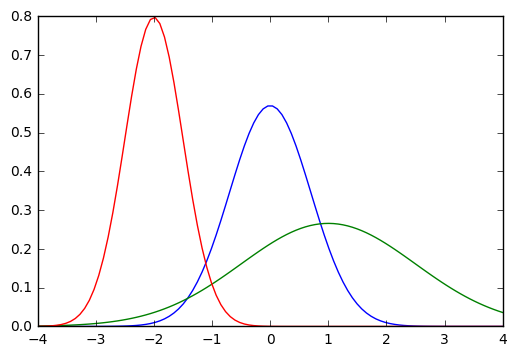

In [6]:
import matplotlib.mlab as mlab
x=np.linspace(-4,4,100)
for mean,variance in [(0,0.7),(1,1.5),(-2,0.5)]:
    plt.plot(x,mlab.normpdf(x,mean,variance))
plt.show()

In [7]:
y=mlab.normpdf(x,0,1)

In [8]:
type(y)

numpy.ndarray

åå¼çä¸¤ç§è®¡ç®æ¹æ³
SSE ----è¯¯å·®å¹³æ¹å/åæ¹å·®
ç´æ¹å¾çåæ³ï¼ç¬¬ä¸æ è¡¨ç¤ºåæ¹å·®å¨0-100ä»¥åçæå¤§çº¦350ç»

In [9]:
print(df['target'].mean())
print(np.mean(df['target']))
mean_expected_value=np.mean(df['target'])

22.532806324110698
22.532806324110698


In [10]:
df.ix[:,'target'].mean()

22.532806324110698

In [11]:
Square_errors=pd.Series(mean_expected_value-df['target'])**2
SSE=np.sum(Square_errors)
print('Sum of Squared Errors (SSE): %f'%SSE)

Sum of Squared Errors (SSE): 42716.295415


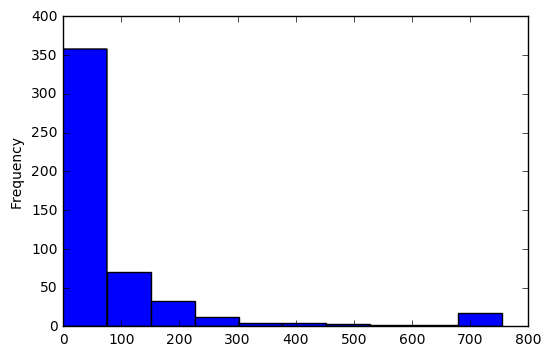

In [12]:
density_plot=Square_errors.plot('hist')

æ åå
æ ååè¿å,åå¼ä¸º0,æ¹å·®ä¸º1

In [13]:
def standardize(x):
    return (x-np.mean(x))/np.std(x)

In [15]:
standardize_target=standardize(df['target'])

In [16]:
standardize_target.std()

1.0009896093465709

In [17]:
standardize_target.mean()

-3.020859802972165e-15

è¿ä¸ªå½æ°è®¡ç®å±åæ§

In [21]:
def covariance(variable_1, variable_2, bias=0):       
    observations = float(len(variable_1))      
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2)))/(observations-min(bias,1))  

è¿ä¸ªå½æ°è®¡ç®ç¸å³æ§,åºå«å°±æ¯è¾å¥ç»è¿æ åå

In [22]:
def correlation(var1,var2,bias=0):      
    return covariance(standardize(var1), standardize(var2),bias) 

In [20]:
from scipy.stats.stats import pearsonr  
print ('Our correlation estimation: %0.5f' % (correlation(df['RM'], df['target'])))  
print ('Correlation from Scipy pearsonr estimation: %0.5f' % pearsonr(df['RM'], df['target'])[0])

Our correlation estimation: 0.69536
Correlation from Scipy pearsonr estimation: 0.69536


In [23]:
print(pearsonr(df['RM'],df['target']))

(0.69535994707153925, 2.4872288710082951e-74)


Let's graph what happens when we correlate two variables. Using a scatterplot, we can easily visualize the two involved variables. A scatterplot is a graph where the values of two variables are treated as Cartesian coordinates; thus, for every (x, y) value a point is represented in the graph


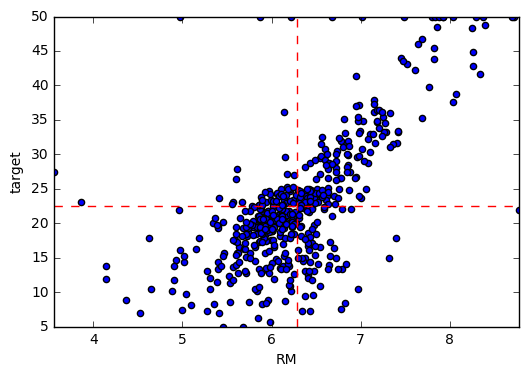

In [28]:
x_range = [df['RM'].min(),df['RM'].max()]  
y_range = [df['target'].min(),df['target'].max()]  
scatter_plot = df.plot(kind='scatter', x='RM', y='target',xlim=x_range, ylim=y_range)
meanY = scatter_plot.plot(x_range, [df['target'].mean(),df['target'].mean()], '--' , color='red', linewidth=1) 
meanX = scatter_plot.plot([df['RM'].mean(),df['RM'].mean()], y_range, '--', color='red', linewidth=1)

The scatterplot also plots the average value for both the target and the predictor variables as dashed lines. This divides the plot into four quadrants. If we compare it with the previous covariance and correlation formulas, we can understand why the correlation value was close to 1: in the bottom-right and in top-left quadrants, there are just a few mismatching points where one of variables is above its average and the other is below its own.A perfect match (correlation values of 1 or -1) is possible only when the points are in a straight line (and all points are therefore concentrated in the right-uppermost and left-lowermost quadrants). Thus, correlation is a measure of linear association, of how close to a straight line your points are. Ideally, having all your points on a single line favors a perfect mapping of your predictor variable to your target.